# 4 Multi-class Neural Networks
<p>We'll implement multi-class Neural Networks (NN), with One Hidden Layer.</p>
<p>Practice: NN with 1 Hidden Layer</p>
<ul>
    <li><a href="#data">Data</a></li>
    <li><a href="#model">Create the Model and Loss function: Cross Entropy</a></li>
    <li><a href="#training">Training</a></li>
    <li><a href="#results">Results</a></li>
</ul>

In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

In [2]:
# Helper function: plotting
def plot_accuracy_loss(training_results): 
    plt.subplot(2, 1, 1)
    plt.plot(training_results['training_loss'], 'r')
    plt.ylabel('loss')
    plt.title('training loss iterations')
    plt.subplot(2, 1, 2)
    plt.plot(training_results['validation_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epochs')   
    plt.show()
    
def print_model_parameters(model):
    count = 0
    for ele in model.state_dict():
        count += 1
        if count % 2 != 0:
            print ("The following are the parameters for the layer ", count // 2 + 1)
        if ele.find("bias") != -1:
            print("The size of bias: ", model.state_dict()[ele].size())
        else:
            print("The size of weights: ", model.state_dict()[ele].size())
            
def show_data(data_sample):
    plt.imshow(data_sample.numpy().reshape(28, 28), cmap='gray')
    plt.show()

## <a name="data" id="data">Data</a>

In [3]:
# Create training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

In [4]:
# Create validating dataset
validation_dataset = dsets.MNIST(root='./data', download=True, transform=transforms.ToTensor())

## <a name="model" id="model">Model: Neural network and loss criterion</a>
We can also use nn.Sequential
```
model = torch.nn.Sequential(
    torch.nn.Linear( input_dim, hidden_dim,
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_dim, output_dim)
)
```

In [5]:
# Define the class Net
class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction    
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))  
        x = self.linear2(x)
        return x

In [6]:
# Define the Neural Network, Criterion, and Optimizer:
torch.manual_seed(0)

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

criterion = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

print_model_parameters(model)

The following are the parameters for the layer  1
The size of weights:  torch.Size([100, 784])
The size of bias:  torch.Size([100])
The following are the parameters for the layer  2
The size of weights:  torch.Size([10, 100])
The size of bias:  torch.Size([10])


## <a name="training" id="training">Training</a>
**May take a few minutes**

In [7]:
def train(model, criterion, train_loader, validation_loader, optimizer, epochs=100):
    i = 0
    output_tracking = {'training_loss': [],'validation_accuracy': []}  
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader): 
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
             #loss for every iteration
            output_tracking['training_loss'].append(loss.data.item())
        correct = 0
        for x, y in validation_loader:
            #validation 
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        output_tracking['validation_accuracy'].append(accuracy)
    return output_tracking

In [8]:
# Train the model
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

## <a name="results" id="results">Results</a>

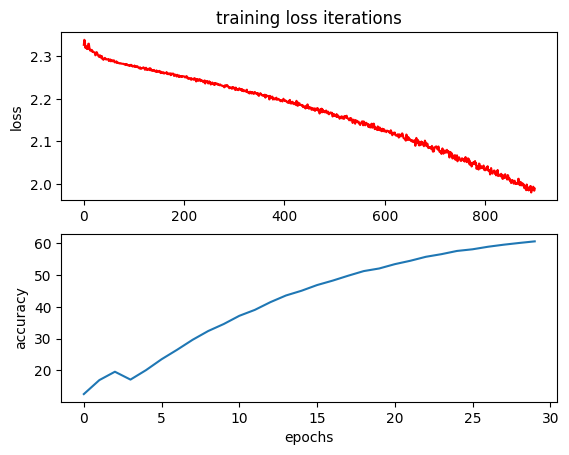

In [9]:
# Plot the loss
plot_accuracy_loss(training_results)
# plt.xlabel('x0')
# plt.ylabel('x1')

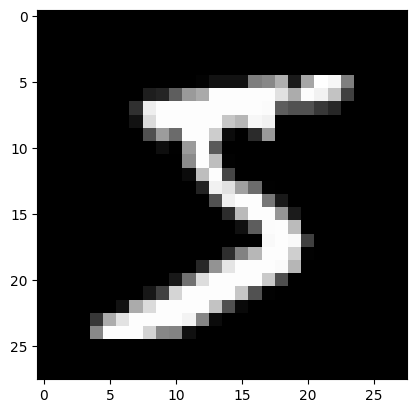

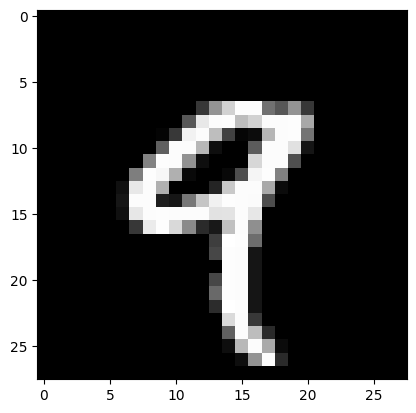

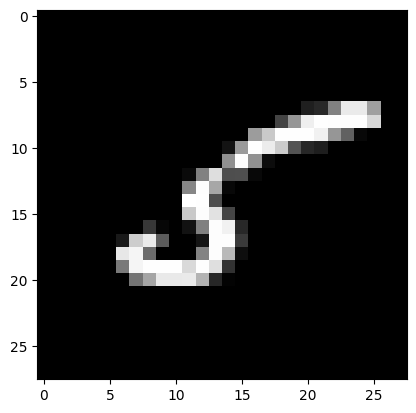

In [10]:
# Analyze 3 misclassified samples

count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _,y_hat = torch.max(z, 1)

    if y_hat != y:
        show_data(x)
        count += 1

    if count >= 3:
        break